In [ ]:
# !pip install split-folders
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'val')

datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)
 
 
train_generator = datagen.flow_from_directory(
        base_dir,  
        target_size=(100, 150), 
        batch_size=32,
        class_mode='categorical',
        subset='training')
 
validation_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        batch_size=32, 
        class_mode='categorical',
        subset='validation')

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 21, 34, 128)       36992     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 8, 15, 64)       

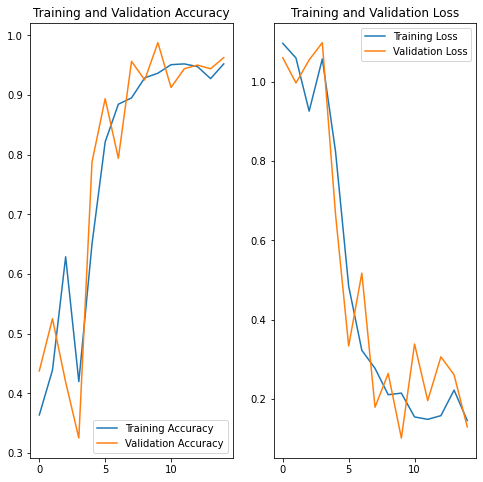

In [38]:
from keras.constraints import maxnorm
from keras.layers import Dropout
epochs = 15
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape= (100,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(600, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
  # ,tf.keras.layers.Dropout(0.2, input_shape=(60,))
])

# model.add(Dropout(0.2, input_shape=(60,)))

model.compile(
      loss = 'categorical_crossentropy',
      optimizer = tf.optimizers.SGD(lr=0.01, momentum=0.9),
      metrics=['accuracy']
    )

model.summary()

history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

import numpy as np
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
1
00nKV8oHuTGi20gq.png
rock


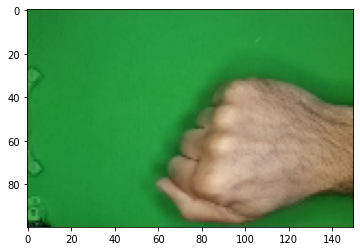

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)

  print(result)

  print(fn)
  if result==0:
    print('paper')
  elif result == 1:
    print('rock')
  else:
    print('scissors')